In [1]:
import numpy as np
from DIG import DIG
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sci
from scipy import io
import phate
import scanpy as sc
import scprep as scp
from mpl_toolkits.mplot3d import Axes3D
from DPT import DPT
from sklearn import datasets
import graphtools

C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\anndata\core\anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


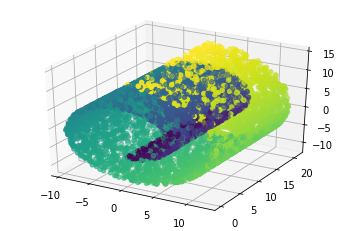

In [2]:
swiss_roll = datasets.make_swiss_roll(8000)
swiss_roll_d = swiss_roll[0]
t = swiss_roll[1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss_roll_d[:,0], swiss_roll_d[:,1], swiss_roll_d[:,2], c=t, marker='o')
plt.show()

## Compute diffusion pseudotime 

In [3]:
dpt_c = DPT()
dpt = dpt_c.compute_dpt(swiss_roll_d)

C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:115: RuntimeWarning: Cannot perform PCA to 10 dimensions on data with min(n_samples, n_features) = 3
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


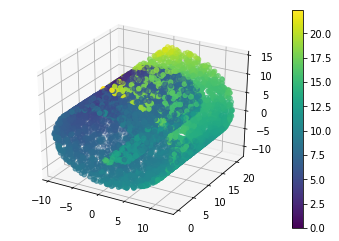

In [4]:
# plot the data colored by dpt respect to 'ind' observation
ind=7500
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(swiss_roll_d[:,0], swiss_roll_d[:,1], swiss_roll_d[:,2], c=dpt.dpt[:,ind], marker='o')
fig.colorbar(p)

In [5]:
# order the dpt with respect to each observation
dpt_or = np.argsort(dpt.dpt, axis=0)

In [6]:
# Compute histogram distances
dig = DIG(dpt = dpt_or, n_bins = 10, L1 = 500, L2 = 50, L3=5)
hist = dig.compute_hist_distances(swiss_roll_d)

In [7]:
# Use phate with the mahalanobis distance in the histograms space
phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20)
phate_fit = phate_emb.fit_transform(hist.histogram_distances)
labels = t[hist.centers_histograms.astype(int)].flatten()

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.31 seconds.
  Calculated graph and diffusion operator in 0.36 seconds.
  Calculating optimal t...
    Automatically selected t = 44
  Calculated optimal t in 1.02 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.45 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 39.34 seconds.
Calculated PHATE in 41.22 seconds.


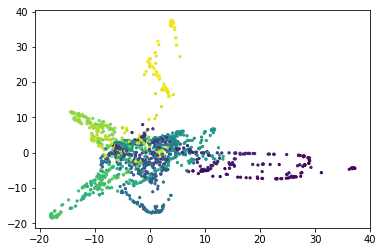

In [8]:
plt.scatter(phate_fit[:,0],phate_fit[:,1], 5, c = labels)

In [9]:
L3_values = [2, 5]   
L2_values = [3, 5, 50, 200]   
emb = []
for L2 in L2_values:   
    for L3 in L3_values:
        dig = DIG(dpt = dpt_or, n_bins = 20, L1 = 500, L2 = L2, L3 = L3)
        hist = dig.compute_hist_distances(swiss_roll_d)
        phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20, t = 20)
        phate_fit = phate_emb.fit_transform(hist.histogram_distances)
        title = "L2="+str(L2) + "L3="+str(L3)
        embedding = [phate_fit, hist.centers_histograms, title]
        emb.append(embedding)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 3750 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:896: RuntimeWarning: overflow encountered in power


    Calculated affinities in 1.68 seconds.
  Calculated graph and diffusion operator in 2.19 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.10 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.65 seconds.
  Calculated landmark operator in 18.36 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 67.65 seconds.
Calculated PHATE in 89.12 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:896: RuntimeWarning: overflow encountered in power


    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 27.64 seconds.
Calculated PHATE in 28.37 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 3750 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:896: RuntimeWarning: overflow encountered in power


    Calculated affinities in 1.59 seconds.
  Calculated graph and diffusion operator in 2.04 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.89 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.33 seconds.
  Calculated landmark operator in 15.81 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.78 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 103.30 seconds.
Calculated PHATE in 121.96 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\graphs.py:896: RuntimeWarning: overflow encountered in power


    Calculated affinities in 0.29 seconds.
  Calculated graph and diffusion operator in 0.35 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.41 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 17.00 seconds.
Calculated PHATE in 17.80 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 3750 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 1.52 seconds.
  Calculated graph and diffusion operator in 2.02 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.87 seconds.
    Calculating KMeans...
    Calculated KMeans in 19.07 seconds.
  Calculated landmark operator in 20.54 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.84 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 27.21 seconds.
Calculated PHATE in 50.63 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.52 seconds.
Calculated PHATE in 6.26 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 3750 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 1.88 seconds.
  Calculated graph and diffusion operator in 2.60 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.09 seconds.
    Calculating KMeans...
    Calculated KMeans in 25.09 seconds.
  Calculated landmark operator in 26.79 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.77 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.86 seconds.
Calculated PHATE in 43.05 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.37 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 10.08 seconds.
Calculated PHATE in 10.82 seconds.


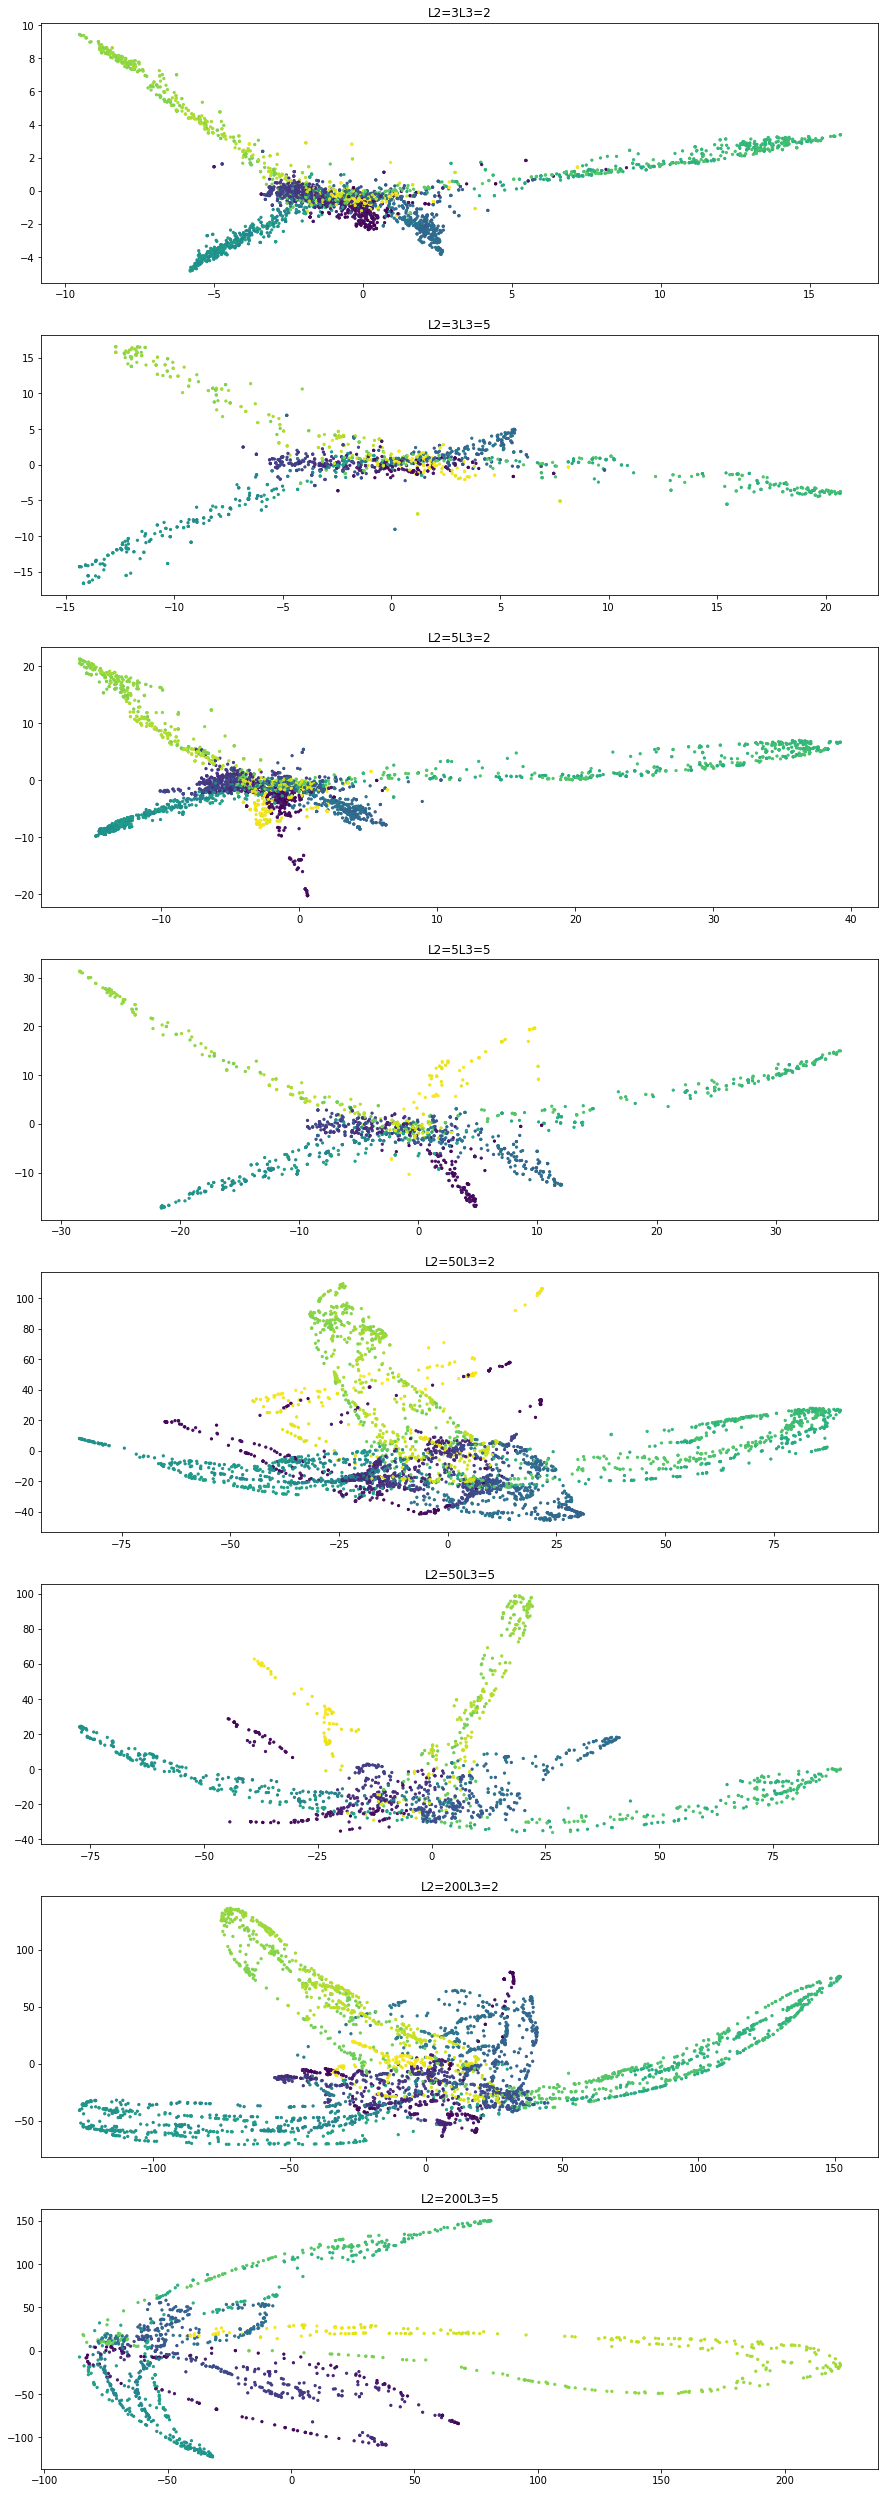

In [10]:
fig, axs = plt.subplots(len(emb),1, figsize=(15,45))
for i in range(len(emb)):
    cells = t[emb[i][1]].flatten()
    axs[i].scatter(emb[i][0][:,0],emb[i][0][:,1], 5, c = cells)
    axs[i].set_title(emb[i][2])

# Euclidean distance histograms space





In [11]:
dig = DIG(dpt = dpt_or, n_bins = 10, L1 = 500, histograms_distance='euclidean')
hist = dig.compute_hist_distances(swiss_roll_d)
phate_emb = phate.PHATE(knn_dist='precomputed_distance', knn = 20, t = 20)
phate_fit = phate_emb.fit_transform(hist.histogram_distances)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1500 cells.
  Calculating graph and diffusion operator...
    Calculating affinities...


C:\Users\Andres Duque\AppData\Local\Continuum\anaconda3\lib\site-packages\graphtools-1.2.0a0-py3.6.egg\graphtools\base.py:118: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 0.40 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.41 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.11 seconds.
Calculated PHATE in 9.96 seconds.


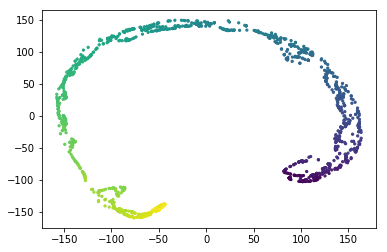

In [12]:
labels = t[hist.centers_histograms].flatten()
plt.scatter(phate_fit[:,0],phate_fit[:,1], 5, c = labels)